## Transform the image

In [1]:
import cv2
import numpy as np
import os

pixels = []
labels = []
dic = {"anger":0,"contempt":1,"disgust":2,"fear":3,"happy":4,"sadness":5,"surprise":6}
emotions = ["anger","contempt","disgust","fear","happy","sadness","surprise"]

src = 'Images'
emodirs = os.listdir(src)
for emodir in emodirs:
    if (emodir == ".DS_Store"):
        continue
    images = os.listdir(src+"/"+emodir)
    for image in images:
        
        pixels.append((cv2.imread(src+"/"+emodir+"/"+image)))
        labels.append(dic[emodir])
        
        
pixels = np.array(pixels)
pixels = pixels.astype("float32")
pixels /= 255
labels = np.array(labels)

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pixels, labels, test_size=0.1)

In [3]:
np.shape(X_train)

(882, 48, 48, 3)

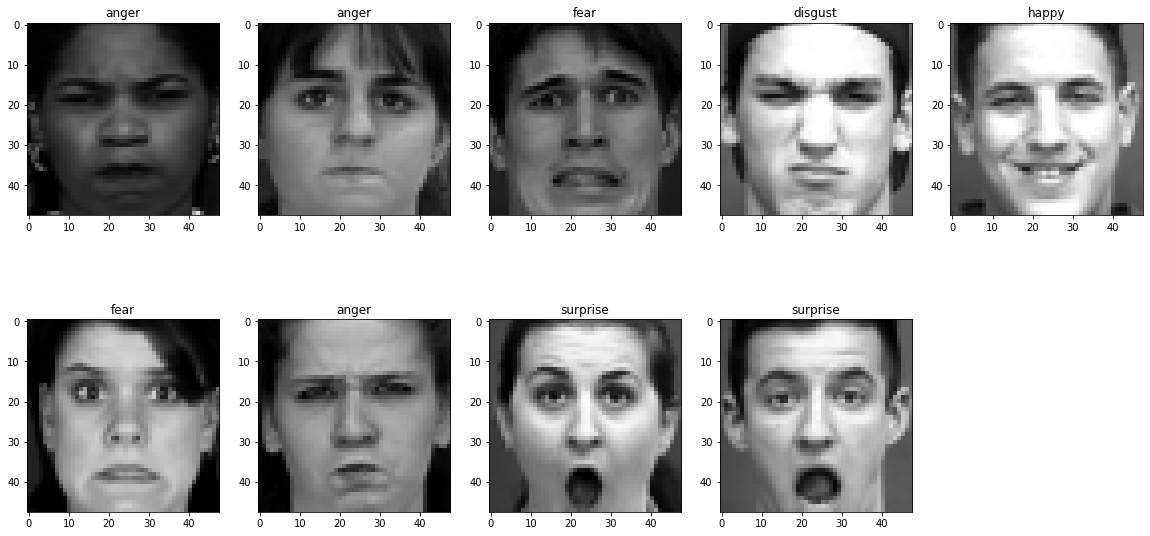

In [4]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,10))
for i in range(0, 9):
    input_img = X_train[i]
    title = emotions[y_train[i]]
    ax = fig.add_subplot(2,5,i+1)
    ax.imshow(input_img, cmap=plt.cm.gray)
    ax.set_title(title)

In [5]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [6]:
print(np.shape(y_train))
print(np.shape(y_test))

(882, 7)
(99, 7)


## Training

In [7]:
from keras import layers
from keras import models
from keras import optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu',
                        input_shape=(48, 48, 3)))
model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(7, activation='softmax'))

# optimizer:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 32)        9248      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        36928     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)        3

In [8]:
print ('Training....')
modelF = model.fit(X_train, y_train, epochs=32, batch_size=128, shuffle=True, verbose=1)

Training....
Epoch 1/32
7/7 [==============================] - 4s 582ms/step - loss: 1.9376 - accuracy: 0.2279
Epoch 2/32
7/7 [==============================] - 4s 604ms/step - loss: 1.8928 - accuracy: 0.2528
Epoch 3/32
7/7 [==============================] - 4s 583ms/step - loss: 1.8389 - accuracy: 0.2528
Epoch 4/32
7/7 [==============================] - 4s 604ms/step - loss: 1.8329 - accuracy: 0.2528
Epoch 5/32
7/7 [==============================] - 4s 575ms/step - loss: 1.8380 - accuracy: 0.2528
Epoch 6/32
7/7 [==============================] - 4s 584ms/step - loss: 1.8227 - accuracy: 0.2528
Epoch 7/32
7/7 [==============================] - 4s 597ms/step - loss: 1.8318 - accuracy: 0.2528
Epoch 8/32
7/7 [==============================] - 4s 596ms/step - loss: 1.8153 - accuracy: 0.2528
Epoch 9/32
7/7 [==============================] - 4s 633ms/step - loss: 1.8068 - accuracy: 0.2528
Epoch 10/32
7/7 [==============================] - 4s 596ms/step - loss: 1.7863 - accuracy: 0.2596
Epoch 

## Test

In [9]:
model.evaluate(X_test,y_test)

4/4 [==============================] - 0s 20ms/step - loss: 0.0057 - accuracy: 1.0000


[0.005733501631766558, 1.0]

In [37]:
def backToEmo(y_pred):
    new_y_pred = []
    Emotions = ["anger","contempt","disgust","fear","happy","sadness","surprise"]
    num_ob = [0,1,2,3,4,5,6]
    for p in range (len(y_pred)):
        a=y_pred[p]
        m = a[0]
        ind = 0
        for i in range(0,len(a)):
            if a[i]>m:
                m=a[i]
                ind=i
        new_y_pred.append(Emotions[num_ob[ind]])
    return new_y_pred

In [38]:
myimage = cv2.imread("mysmile.jpg")
np.shape(myimage)

(3088, 2320, 3)

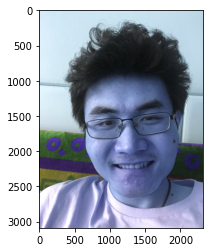

In [39]:
plt.imshow(myimage,cmap=plt.cm.gray)

In [40]:
myimage = cv2.resize(myimage,(48,48),interpolation=cv2.INTER_CUBIC)
np.shape(myimage)
myimage = np.array(myimage)
myimage = myimage.astype("float32")
myimage /= 255

In [41]:
pred = model.predict(np.reshape(myimage,(1,48,48,3)))

In [42]:
pred

array([[1.8151992e-15, 1.6127292e-08, 1.7224136e-10, 1.4199450e-08,
        1.0000000e+00, 4.2114595e-22, 4.5300996e-19]], dtype=float32)

['happy']

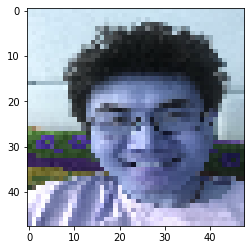

In [43]:
plt.imshow(myimage,cmap=plt.cm.gray)
pred = backToEmo(pred)
pred

In [44]:
angryimage = cv2.imread("angry.jpg")
angryimage = cv2.resize(angryimage,(48,48),interpolation=cv2.INTER_CUBIC)
angryimage = np.array(angryimage)
angryimage = angryimage.astype("float32")
angryimage /= 255

['anger']

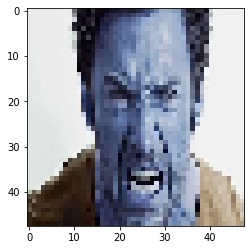

In [45]:
plt.imshow(angryimage,cmap=plt.cm.gray)
pred = model.predict(np.reshape(angryimage,(1,48,48,3)))
pred = backToEmo(pred)
pred